pip install PuLP

In [5]:
import pulp
# Define variables
x = pulp.LpVariable("x", 0, 3)
y = pulp.LpVariable("y", 0, 1)

# Define problem
prob = pulp.LpProblem("myProblem", pulp.LpMinimize)
# Add constriants
prob += x + y <= 2
# Add OF
prob += -4*x + y

# Solve with default included solver
status = prob.solve()
# Try another solver
# status = prob.solve(pulp.GLPK(msg = 0))

# Print info
print(f"Status {pulp.LpStatus[status]}, prob={status}, with x={pulp.value(x)}, y={pulp.value(y)}")

Status Optimal, prob=1, with x=2.0, y=0.0


In [75]:
import pulp
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [85]:

# User input
# T = 16*3600 # s, maximal operation time for every machine 
# MA = 10 # Real number of avaliable machines
# t = {f"Test#{i}":10_000*i for i in range(13)} # s, time for solving task/test with index k

T = 16 # s, maximal operation time for every machine 
MA = 16 # Real number of avaliable machines
t = {f"Test#{i}":2*(i+1) for i in range(8)} # s, time for solving task/test with index k

# System constants
M = math.ceil(3*sum(t.values())/T) # maximal number of machines (constant). It is not real number of machines. Value M is used to find feasible solution.
K = len(t)

# Create a PuLP optimization problem
prob = pulp.LpProblem("TestPlanner", pulp.LpMinimize)

# Create a 2D matrix of binary variables
s = [[pulp.LpVariable(f"s_m{m}_t{k}", cat=pulp.LpBinary) for k in range(K)] for m in range(M)]

# Create the constraint for each machine
for m in range(M):
    constraint_expr = pulp.lpSum(s[m][k] * t[f"Test#{k}"] for k in range(K)) <= T
    prob += constraint_expr, f"Machine_Time_Constraint_{m}"

# Create the constraint for each test
for k in range(K):
    constraint_expr = pulp.lpSum(s[m][k] for m in range(M)) == 1
    prob += constraint_expr, f"Force_Test_Constraint_{k}"

# Create objective function
prob += pulp.lpSum(s[m][k] for m in range(M) for k in range(K))

# Solve with default included solver
status = prob.solve()

# Print info
print(f"Status {pulp.LpStatus[status]}({status})")


Status Optimal(1)


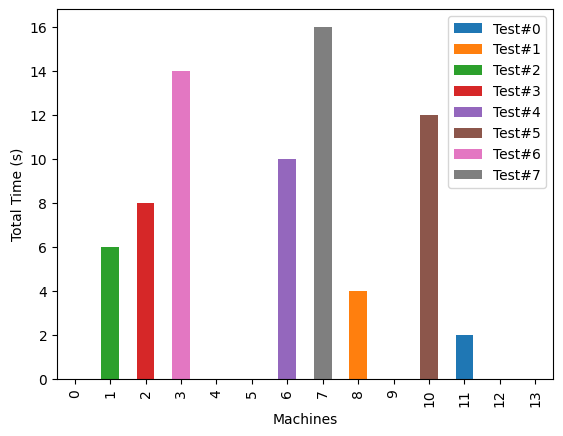

         Test#0  Test#1  Test#2  Test#3  Test#4  Test#5  Test#6  Test#7
Machine                                                                
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0
1           0.0     0.0     6.0     0.0     0.0     0.0     0.0     0.0
2           0.0     0.0     0.0     8.0     0.0     0.0     0.0     0.0
3           0.0     0.0     0.0     0.0     0.0     0.0    14.0     0.0
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0
5           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0
6           0.0     0.0     0.0     0.0    10.0     0.0     0.0     0.0
7           0.0     0.0     0.0     0.0     0.0     0.0     0.0    16.0
8           0.0     4.0     0.0     0.0     0.0     0.0     0.0     0.0
9           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0
10          0.0     0.0     0.0     0.0     0.0    12.0     0.0     0.0
11          2.0     0.0     0.0     0.0     0.0     0.0     0.0 

In [86]:
# Create an empty NumPy array with the same shape as your s matrix
solution_array = np.empty((M, K), dtype=float)
# Fill the NumPy array with the values of pulp variables
for m in range(M):
    for k in range(K):
        solution_array[m][k] = pulp.value(s[m][k])
# Convert t values to a NumPy array
t_values = np.array(list(t.values()))
# Perform element-wise multiplication
result = solution_array * t_values
result_df = pd.DataFrame(result, columns=list(t.keys()))
result_df.index.name = "Machine"

result_df.plot(kind="bar", stacked=True)
plt.xlabel("Machines")
plt.ylabel("Total Time (s)")
plt.show()

print(result_df)

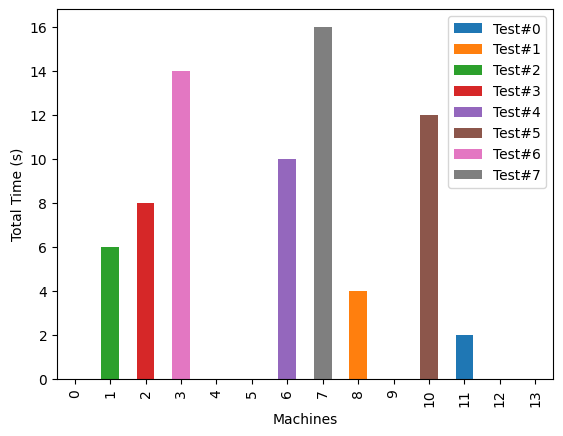

In [35]:
prob


TestPlanner:
MINIMIZE
1*s_m0_t0 + 1*s_m0_t1 + 1*s_m0_t2 + 1*s_m0_t3 + 1*s_m0_t4 + 1*s_m1_t0 + 1*s_m1_t1 + 1*s_m1_t2 + 1*s_m1_t3 + 1*s_m1_t4 + 0
SUBJECT TO
Machine_Time_Constraint_0: s_m0_t1 + 2 s_m0_t2 + 3 s_m0_t3 + 4 s_m0_t4 <= 16

Machine_Time_Constraint_1: s_m1_t1 + 2 s_m1_t2 + 3 s_m1_t3 + 4 s_m1_t4 <= 16

Force_Test_Constraint_0: s_m0_t0 + s_m1_t0 = 1

Force_Test_Constraint_1: s_m0_t1 + s_m1_t1 = 1

Force_Test_Constraint_2: s_m0_t2 + s_m1_t2 = 1

Force_Test_Constraint_3: s_m0_t3 + s_m1_t3 = 1

Force_Test_Constraint_4: s_m0_t4 + s_m1_t4 = 1

VARIABLES
0 <= s_m0_t0 <= 1 Integer
0 <= s_m0_t1 <= 1 Integer
0 <= s_m0_t2 <= 1 Integer
0 <= s_m0_t3 <= 1 Integer
0 <= s_m0_t4 <= 1 Integer
0 <= s_m1_t0 <= 1 Integer
0 <= s_m1_t1 <= 1 Integer
0 <= s_m1_t2 <= 1 Integer
0 <= s_m1_t3 <= 1 Integer
0 <= s_m1_t4 <= 1 Integer